# Project: Breast Cancer  Dataset from Univ Wisconsin
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

The Breast Cancer Wisconsin (Original) Data Set can be imported directly from UC Irvine (what we are doing here)
It can also be directly downloaded from Kaggle

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg

[More info here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

### important information

This goal of the notebook is to familiarize myself with machine learning algorithms using a relavant dataset in my field of work

## Data Wrangling

In [277]:
#Import

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #PLOTTING
import seaborn as sns #PLOTTING
from sklearn.neighbors import KNeighborsClassifier #ML
from sklearn.metrics import classification_report #ML
from sklearn.model_selection import train_test_split #ML



In [278]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                 sep=',', header=None)

#The 10th first features are explained here :
    #https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names
    
#The 10 next is the Standard error of the measure

#The last 10 are the worst measure (mean of the three largest values)

columns =['radius', 'texture','perimeter','area', 
          'smoothness', 'compactness', 'concavity', 
          'concave','symmetry', 'fractal']
#we can create the 20 extra columns names

new_names=[]
for i in columns :
    new_names.append(i + '_se')
for i in columns :
    new_names.append(i + '_w')
    
columns = columns + new_names
len(columns)
    
df.columns = ['id', 'diagnosis'] + columns
df.drop(['id'], axis=1, inplace = True)

#df.head()

df_Norm = df.drop(['diagnosis'], axis =1).apply(lambda x : (x -x.mean())/x.std(), axis=0)


df_Norm.head()


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_w,symmetry_w,fractal_w
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


### Z Score

Before plotting the data (using a ssplitted violinplot) we need to normalize the values to make the visualization easier. We computed the Z score for each variable :

z = (x – μ) / σ

# Exploratory Data Analysis

plotting side by side the data for Malignant en Benign tunors the 30 differents variables.  
Let's plot 10 varaibles at a time



/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


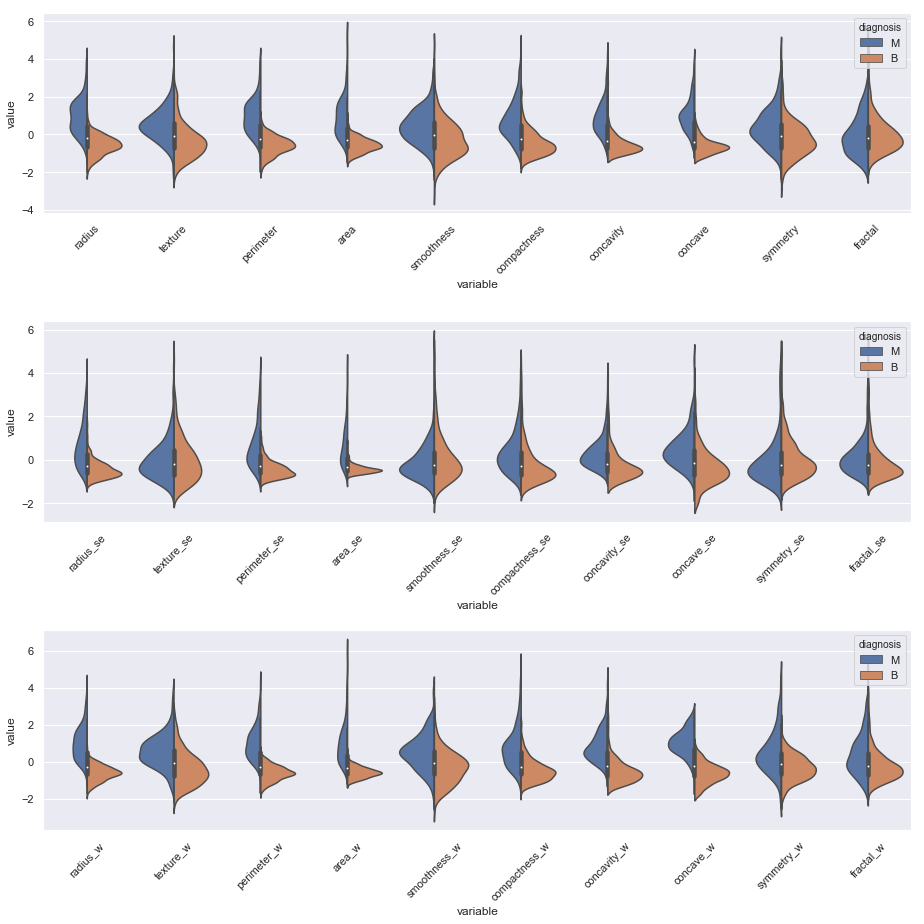

In [279]:
#df_Norm.head()



sns.set(font_scale=1)
df1 = pd.melt(df_Norm.iloc[:,:10].join(df[['diagnosis']]), id_vars=['diagnosis'])
df2 = pd.melt(df_Norm.iloc[:,10:20].join(df[['diagnosis']]), id_vars=['diagnosis'])
df3 = pd.melt(df_Norm.iloc[:,20:30].join(df[['diagnosis']]), id_vars=['diagnosis'])
fig, ax = plt.subplots(3,1, figsize=(13,13))
plt.subplot(3,1,1)
sns.violinplot(data = df1[df1['value']<6], y = 'value', x = 'variable', hue='diagnosis', split= True);
plt.xticks(rotation=45);
plt.subplot(3,1,2)
sns.violinplot(data = df2[df2['value']<6], y = 'value', x = 'variable', hue='diagnosis', split= True);
plt.xticks(rotation=45);
plt.subplot(3,1,3)
sns.violinplot(data = df3[df3['value']<6], y = 'value', x = 'variable', hue='diagnosis', split= True);
plt.xticks(rotation=45);
plt.tight_layout()

#the warning concerns Seaborn


## Correlation between variable

A good way to look of two variables are correlated is to look at the correlation coefficient.  
Using correlation heatmap, we can look at the correlation of every single variables

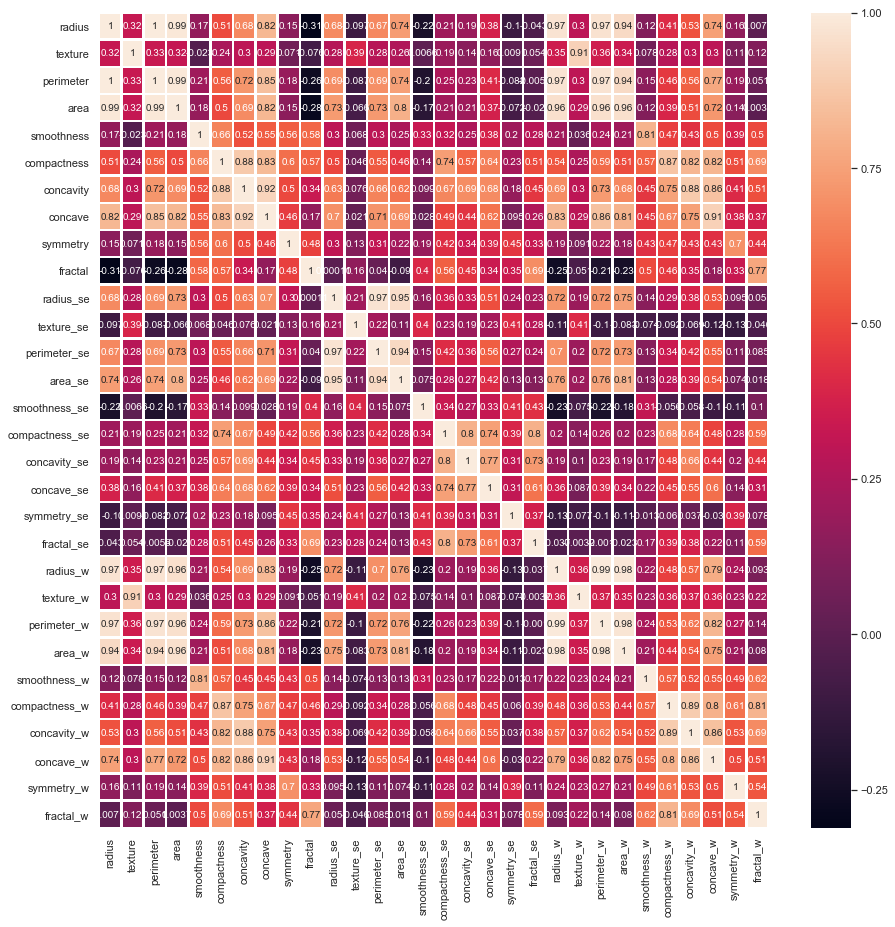

In [280]:
sns.set(font_scale=1)
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_Norm.corr(), annot=True, linewidths=1.5,ax=ax, annot_kws={"size": 10})
plt.show()

## Machine learning

### Using KNN


In [281]:
X = df_Norm.drop(['perimeter'],axis=1) #we delete Perimter as there is a correlation corfficient of 1 with radius
y =df['diagnosis']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train) 

predictions = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

print(classification_report(y_test, predictions))

0.956140350877193
             precision    recall  f1-score   support

          B       0.95      0.99      0.97        72
          M       0.97      0.90      0.94        42

avg / total       0.96      0.96      0.96       114



### the best number of neighbors

The check what is the best number of neighbors to pick we can run a forloop for i neighbors

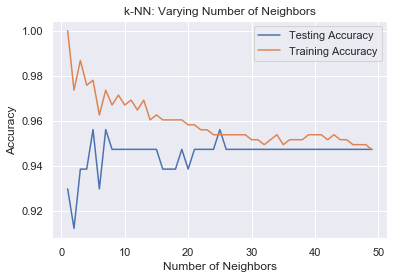

5


In [282]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print (np.argmax(test_accuracy) + 1)  #to get the max

In [283]:
# Create a k-NN classifier with 5, supposed to be the best choice
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train) 

predictions = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

print(classification_report(y_test, predictions))

0.956140350877193
             precision    recall  f1-score   support

          B       0.95      0.99      0.97        72
          M       0.97      0.90      0.94        42

avg / total       0.96      0.96      0.96       114



### results 

We got an accuracy of about 95.6%. That's great, but can we do better ?  
Let's try to remove some of the parameter as some correlate with each other.   
A quick check on the guideline of the dataset says that the best prediction was obtained with only 3 parameters :  

  * area_w
  * smoothness_w
  * texture 


In [291]:
X = df_Norm[['area_w', 'smoothness_w', 'texture']]
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train) 

predictions = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

print(classification_report(y_test, predictions))

0.956140350877193
             precision    recall  f1-score   support

          B       0.96      0.97      0.97        72
          M       0.95      0.93      0.94        42

avg / total       0.96      0.96      0.96       114



## Other Classifier
### random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

X = df_Norm[['area_w', 'smoothness_w', 'texture']]
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

# Fit the classifier to the training data
RF.fit(X_train, y_train) 

predictions = RF.predict(X_test)

# Print the accuracy
print(RF.score(X_test, y_test))

print(classification_report(y_test, predictions))

0.9473684210526315
             precision    recall  f1-score   support

          B       0.92      1.00      0.96        72
          M       1.00      0.86      0.92        42

avg / total       0.95      0.95      0.95       114

